# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**.

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression


# Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [ ]:
data = pd.read_csv('cost_revenue_dirty.csv')


# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [ ]:
# Check the shape (number of rows and columns)
print(data.shape)

# Check for missing values in each column
print(data.isna().sum())

# Drop rows with missing values and modify the DataFrame in place
data.dropna(inplace=True)

# Check for duplicate rows
print(data.duplicated().sum())

# Check the data types of each column
print(data.dtypes)


(5391, 6)
Rank                     0
Release_Date             0
Movie_Title              0
USD_Production_Budget    0
USD_Worldwide_Gross      0
USD_Domestic_Gross       0
dtype: int64
0
Rank                              int64
Release_Date             datetime64[ns]
Movie_Title                      object
USD_Production_Budget           float64
USD_Worldwide_Gross             float64
USD_Domestic_Gross              float64
dtype: object


### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`.
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [ ]:
import pandas as pd

# Define columns to clean
columns_to_clean = ['USD_Production_Budget', 'USD_Worldwide_Gross', 'USD_Domestic_Gross']

# Loop through each column to clean and convert
for col in columns_to_clean:
    # Clean the column: remove '$', ',', and convert to float
    data[col] = (data[col]
                 .astype(str)  # Ensure the column is treated as a string
                 .str.replace('$', '', regex=False)  # Remove dollar signs
                 .str.replace(',', '', regex=False)  # Remove commas
                 .replace('', None)  # Handle empty strings
                 .replace('nan', None))  # Handle string 'nan' if they exist

    # Convert to numeric, setting invalid parsing to NaN
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Display the cleaned data
data.head()


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,110000,11000000,10000000
1,5140,5/9/1916,Intolerance,385907,0,0
2,5230,12/24/1916,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,9/17/1920,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1/1/1925,The Big Parade,245000,22000000,11000000


**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type.

In [ ]:
data['Release_Date'] = pd.to_datetime(data['Release_Date'])
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5391 non-null   int64         
 1   Release_Date           5391 non-null   datetime64[ns]
 2   Movie_Title            5391 non-null   object        
 3   USD_Production_Budget  5391 non-null   int64         
 4   USD_Worldwide_Gross    5391 non-null   int64         
 5   USD_Domestic_Gross     5391 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 252.8+ KB


### Descriptive Statistics

**Challenge**:

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [ ]:

# print(f"Average Budget of Flim Production:$ {data.USD_Production_Budget.mean()}")
# print(f"Average Worldwide Gross Revenue:$ {data.USD_Worldwide_Gross.mean()}")

# data.head()
# print(f"Minmum Worldwide Revenue:$ {data.USD_Worldwide_Gross.min()}")
# print(f"Minmum Domestic Revenue:$ {data.USD_Domestic_Gross.min()}")
# print(f"Highest Production Budget:$ {data.USD_Production_Budget.max()}")
# print(f"Highest Worldwide Gross Revenue:$ {data.USD_Worldwide_Gross.max()}")


 # instead use .describe() method
print(data.describe())

print(f"LowestRevenue Gross:$ {data.loc[data.USD_Production_Budget.idxmin()]}")
print(f"LowestRevenue Gross:$ {data.loc[data.USD_Production_Budget.idxmax()]}")


          Rank                   Release_Date  USD_Production_Budget  \
count 5,391.00                           5391               5,391.00   
mean  2,696.00  2003-09-19 15:02:02.203672704          31,113,737.58   
min       1.00            1915-08-02 00:00:00               1,100.00   
25%   1,348.50            1999-12-02 12:00:00           5,000,000.00   
50%   2,696.00            2006-06-23 00:00:00          17,000,000.00   
75%   4,043.50            2011-11-23 00:00:00          40,000,000.00   
max   5,391.00            2020-12-31 00:00:00         425,000,000.00   
std   1,556.39                            NaN          40,523,796.88   

       USD_Worldwide_Gross  USD_Domestic_Gross  
count             5,391.00            5,391.00  
mean         88,855,421.96       41,235,519.44  
min                   0.00                0.00  
25%           3,865,206.00        1,330,901.50  
50%          27,450,453.00       17,192,205.00  
75%          96,454,455.00       52,343,687.00  
max     

# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [ ]:
zero_domestic_gross = data[data['USD_Domestic_Gross'] == 0]
print(f"Number of films grossed $0 domestically: {len(zero_domestic_gross)}")
zero_domestic_gross.sort_values(inplace= True, by='USD_Production_Budget', ascending= False)
zero_domestic_gross.head()

Number of films grossed $0 domestically: 512


<ipython-input-83-34e46da385ac>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zero_domestic_gross.sort_values(inplace= True, by='USD_Production_Budget', ascending= False)


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0


**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [ ]:
zero_worlwide_gross = data[data['USD_Worldwide_Gross'] == 0]
print(f"Number of films grossed $0 worldwide: {len(zero_worlwide_gross)}")
zero_worlwide_gross.sort_values(inplace= True, by='USD_Production_Budget', ascending= False)
zero_worlwide_gross.head()

Number of films grossed $0 worldwide: 357


<ipython-input-84-b9ba0e907f2c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zero_worlwide_gross.sort_values(inplace= True, by='USD_Production_Budget', ascending= False)


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0


### Filtering on Multiple Conditions

In [ ]:
new_df = data[(data['USD_Domestic_Gross']==0)& (data['USD_Worldwide_Gross']!=0)]
new_df.head()


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0


**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States.

Hint: This time you'll have to use the `and` keyword.

In [ ]:
international_releases = data.query('USD_Domestic_Gross == 0 and USD_Worldwide_Gross != 0')
international_releases.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office?
* Create another DataFrame called data_clean that does not include these films.

In [ ]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

#not_released_movies
not_released_movies = data[data['Release_Date'] > scrape_date]
print(f"Number of films not released yet: {len(not_released_movies)}")
not_released_movies.head(7)

Number of films not released yet: 7


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0


In [147]:
clean_data = data[data['Release_Date'] <= scrape_date]
print(f"Number of films released : {len(clean_data)}")
clean_data.head(7)

Number of films released : 5384


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000
5,4250,1925-12-30,Ben-Hur,3900000,9000000,9000000
6,4630,1927-12-08,Wings,2000000,0,0


### Films that Lost Money

**Challenge**:
What is the percentage of films where the production costs exceeded the worldwide gross revenue?

In [ ]:
clean_data.describe()
greater_cost = len(clean_data[clean_data['USD_Production_Budget'] > clean_data['USD_Worldwide_Gross']])
print(f"Percentage of films where the production costs exceeded the worldwide gross revenue: {greater_cost / len(clean_data) * 100:.2f}%")

Percentage of films where the production costs exceeded the worldwide gross revenue: 37.28%


# Seaborn for Data Viz: Bubble Charts

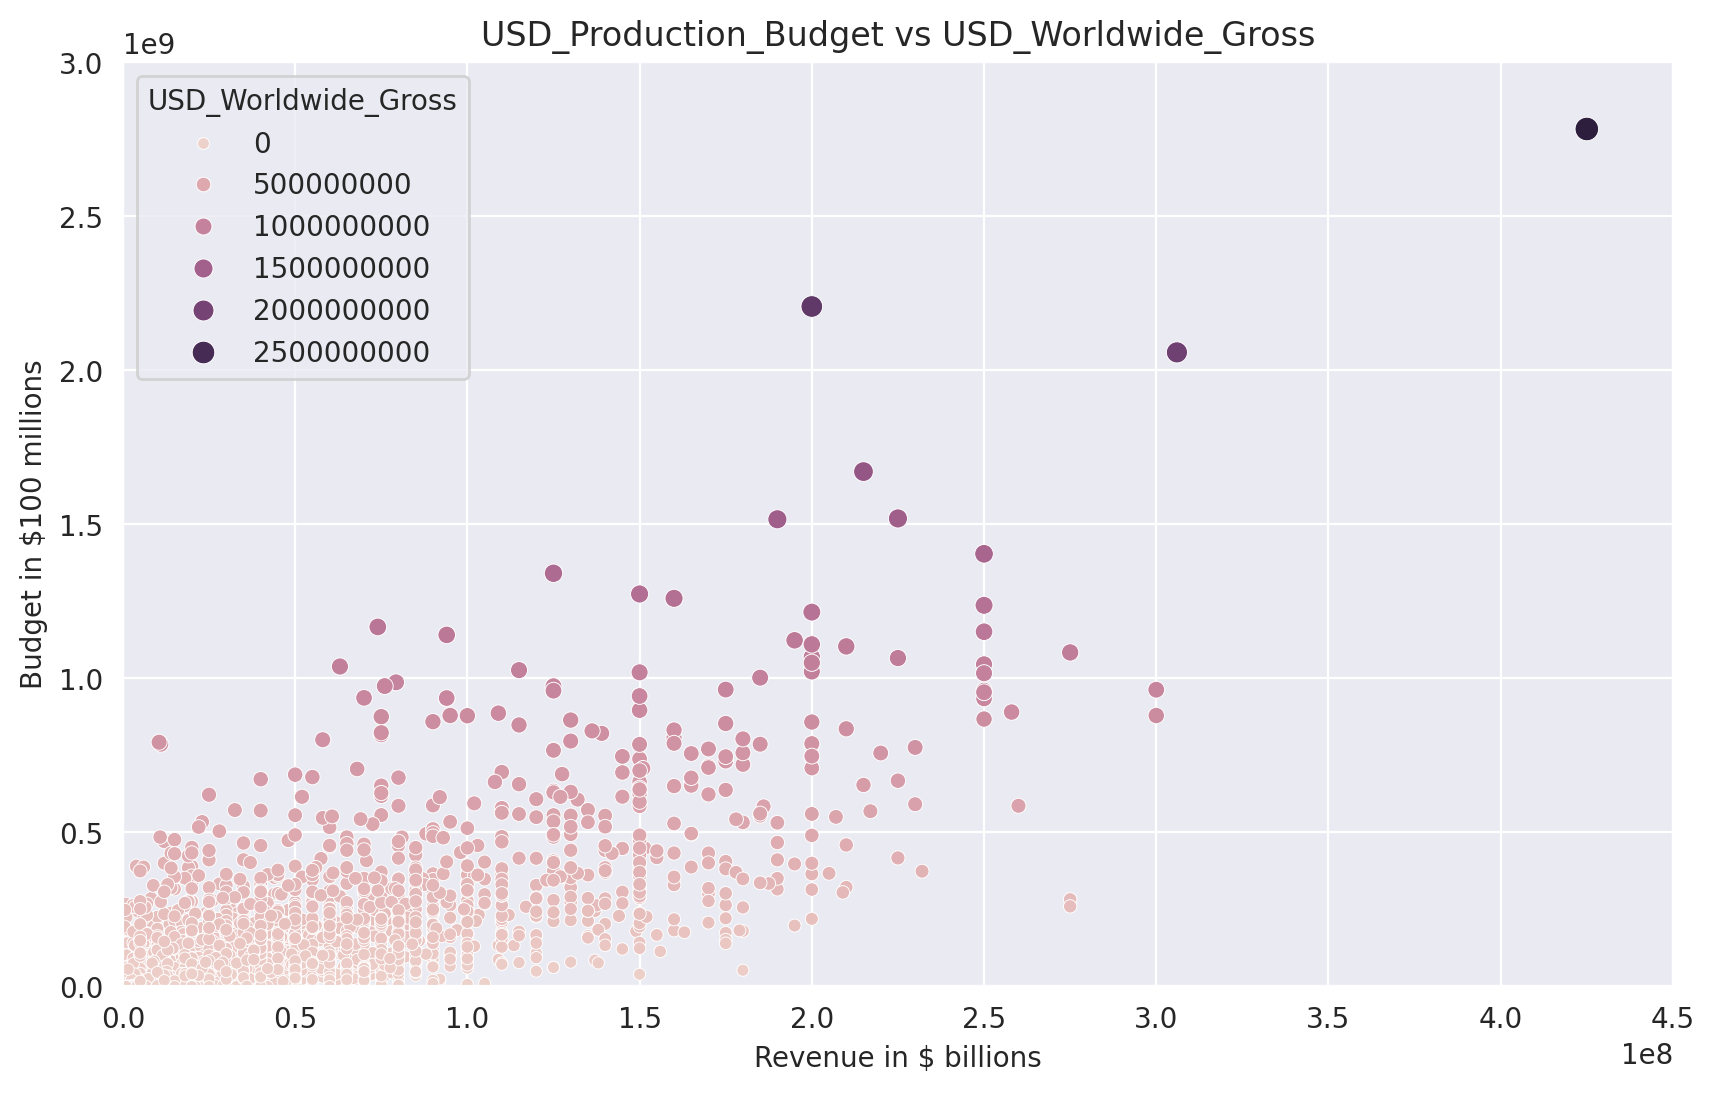

In [148]:
plt.figure(figsize=(10, 6), dpi=200)
sns.set_style(style='darkgrid')
with sns.axes_style('darkgrid'):
  ax = sns.scatterplot(data=clean_data,
                       x='USD_Production_Budget',
                       y='USD_Worldwide_Gross',
                       hue='USD_Worldwide_Gross',
                       size='USD_Worldwide_Gross')
ax.set(
    xlabel='Revenue in $ billions',
    ylabel='Budget in $100 millions',
    title='USD_Production_Budget vs USD_Worldwide_Gross',
    ylim=(0, 3000000000),
    xlim=(0, 450000000),
)
plt.show()

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



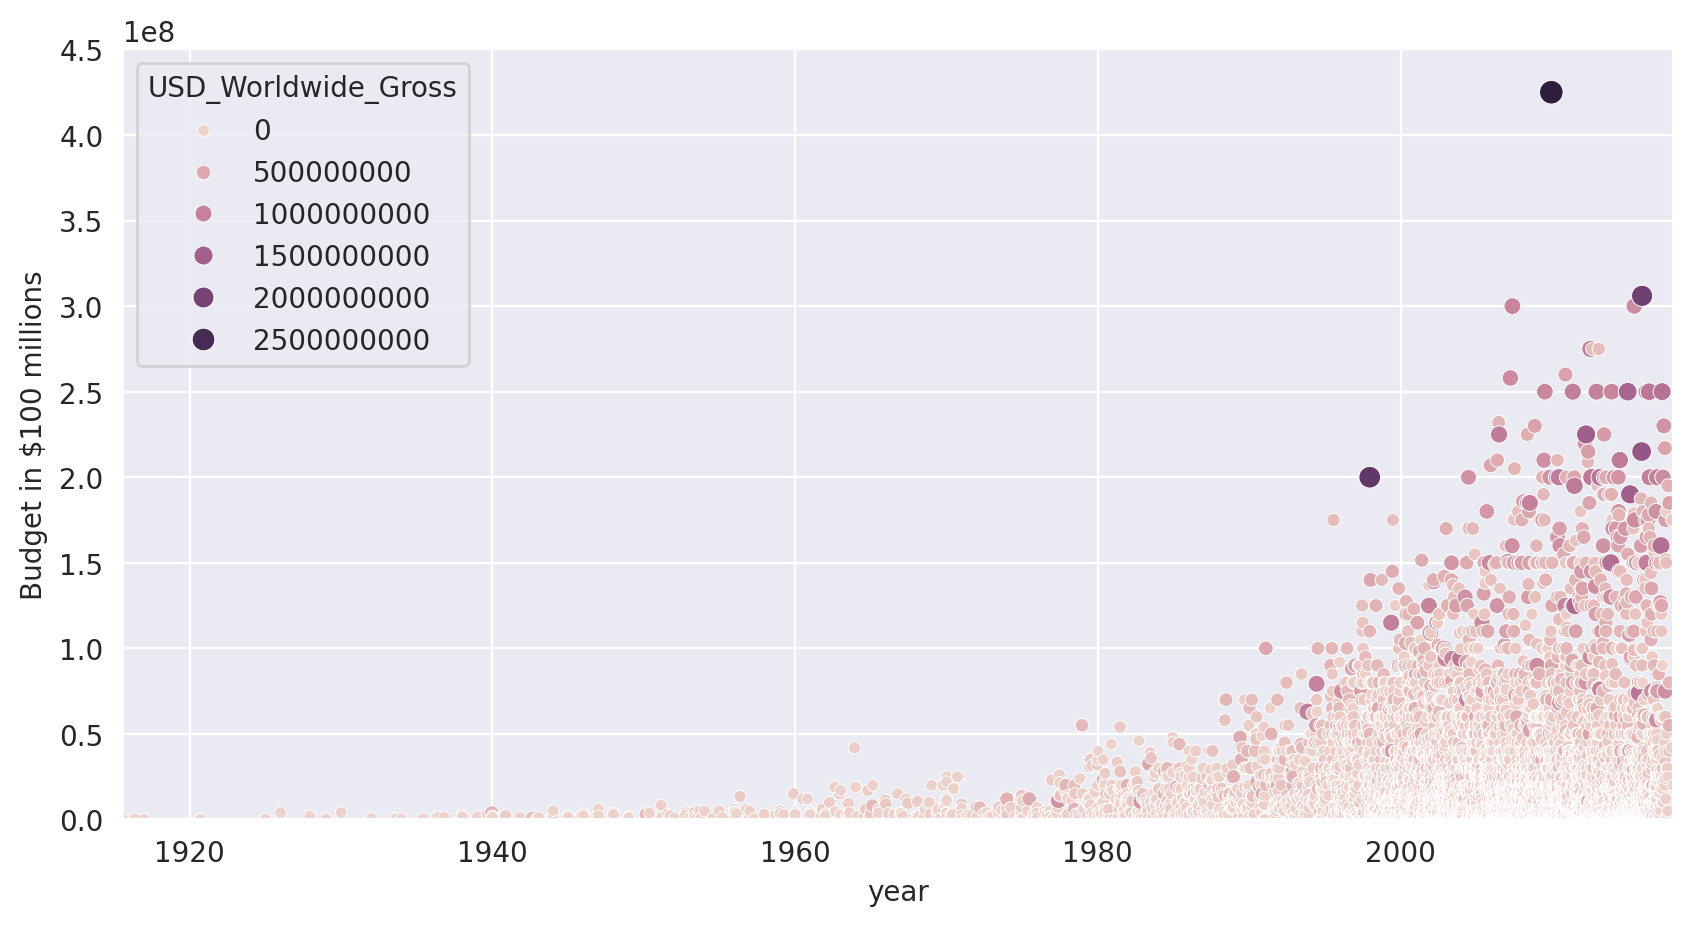

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

In [149]:
plt.figure(figsize=(10, 5), dpi=200)
sns.set_style(style='darkgrid')
with sns.axes_style('darkgrid'):
  ax = sns.scatterplot(data=clean_data,
                       x='Release_Date',
                       y='USD_Production_Budget',
                       hue='USD_Worldwide_Gross',
                       size='USD_Worldwide_Gross')
ax.set(
    xlabel='year',
    ylabel='Budget in $100 millions',
    ylim=(0, 450000000),
    xlim=(clean_data.Release_Date.min(), clean_data.Release_Date.max())

)
plt.show()

plt.figure(figsize=(8,4), dpi=200)


# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release.

<img src=https://i.imgur.com/0VEfagw.png width=650>

Here's how:
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column.
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [ ]:
clean_data.loc[:,'Decade'] = clean_data['Release_Date'].dt.year // 10 * 10
clean_data.head()
scrape_dt = pd.to_datetime('2018-5-1')
print(scrape_dt.year)

2018


### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [ ]:
old_lims = clean_data[clean_data['Decade']<1970]
new_lims = clean_data[clean_data['Decade']>=1970]
print(f"Number of films released prior to 1970: {len(old_lims)}")
print(f"Most Expensive Flim: {old_lims.loc[old_lims['USD_Production_Budget'].idxmax()]}")

Number of films released prior to 1970: 153
Most Expensive Flim: Rank                                    1253
Release_Date             1963-12-06 00:00:00
Movie_Title                        Cleopatra
USD_Production_Budget               42000000
USD_Worldwide_Gross                 71000000
USD_Domestic_Gross                  57000000
Decade                                  1960
Name: 109, dtype: object


# Seaborn Regression Plots

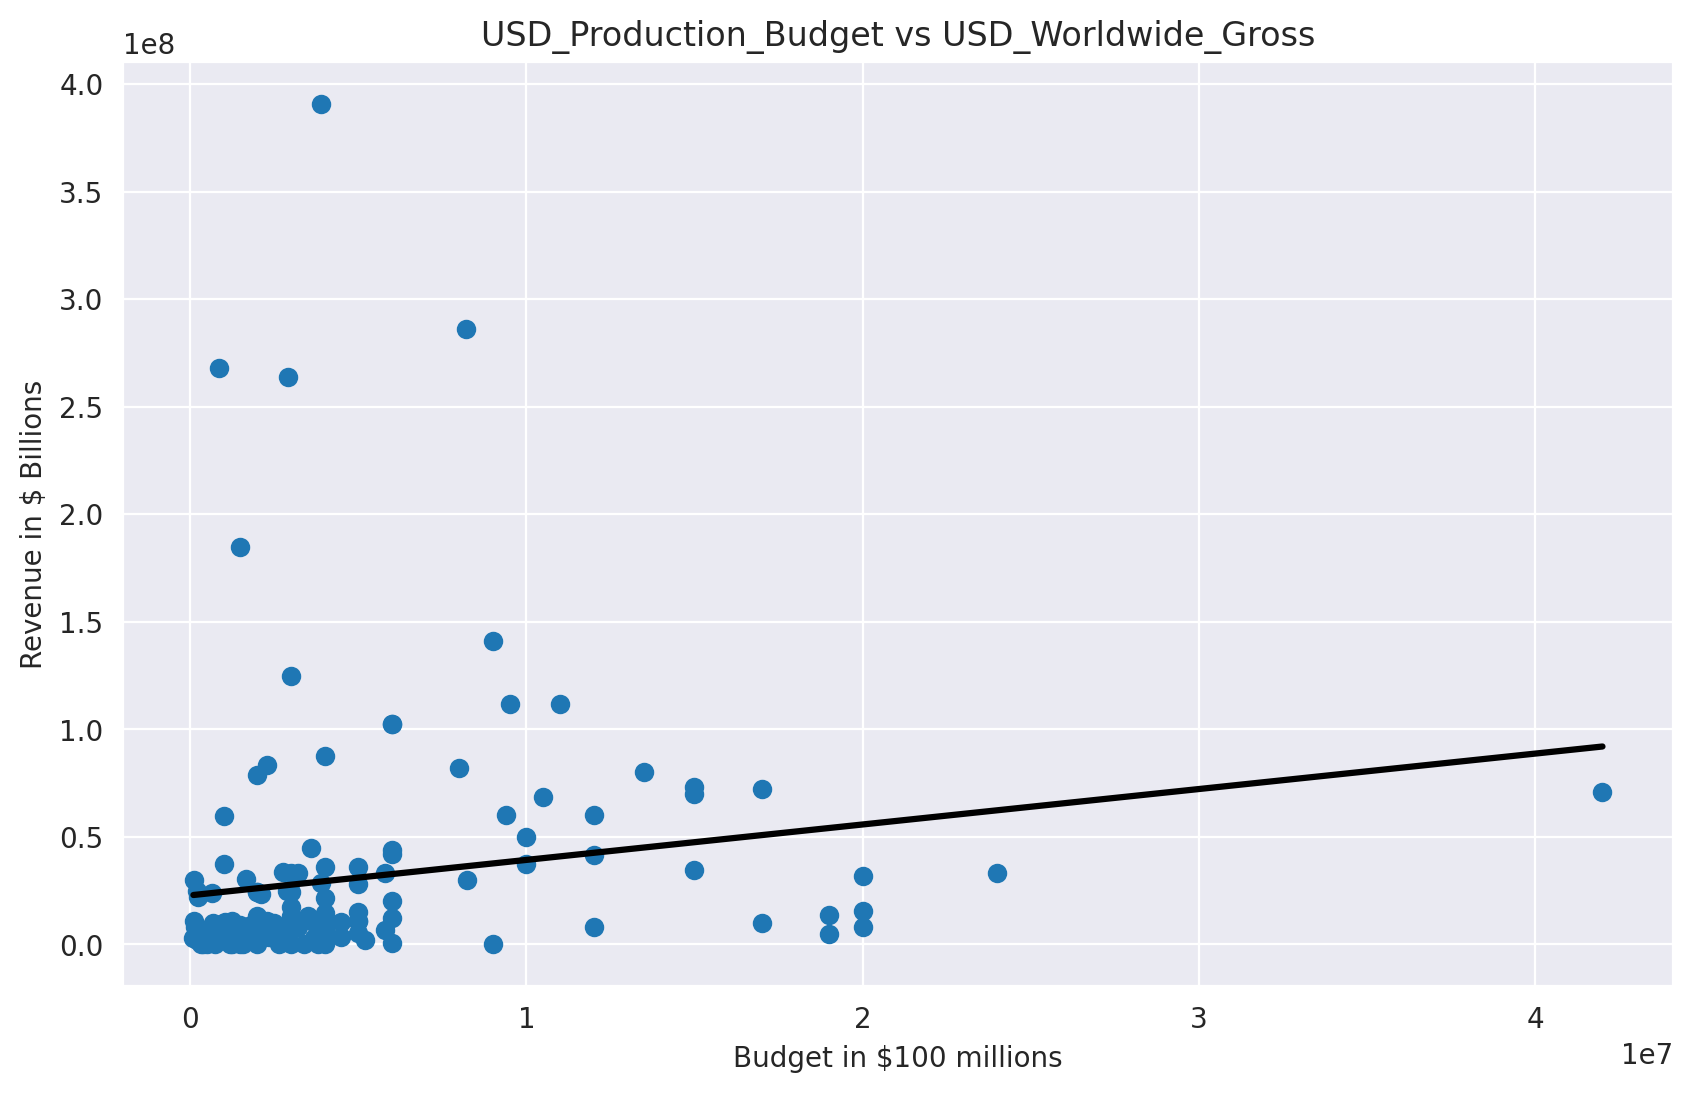

In [150]:
plt.figure(figsize=(10, 6), dpi=200)
with sns.axes_style('darkgrid'):
  ax = sns.regplot(data=old_lims,
                   x='USD_Production_Budget',
                   y='USD_Worldwide_Gross',
                   ci=None,
                   scatter_kws={'alpha': 1},
                   line_kws={'color': 'black'}
                   )
ax.set(
    xlabel='Budget in $100 millions',
    ylabel='Revenue in $ Billions',
    title='USD_Production_Budget vs USD_Worldwide_Gross',
                   )
plt.show()


**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`.
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

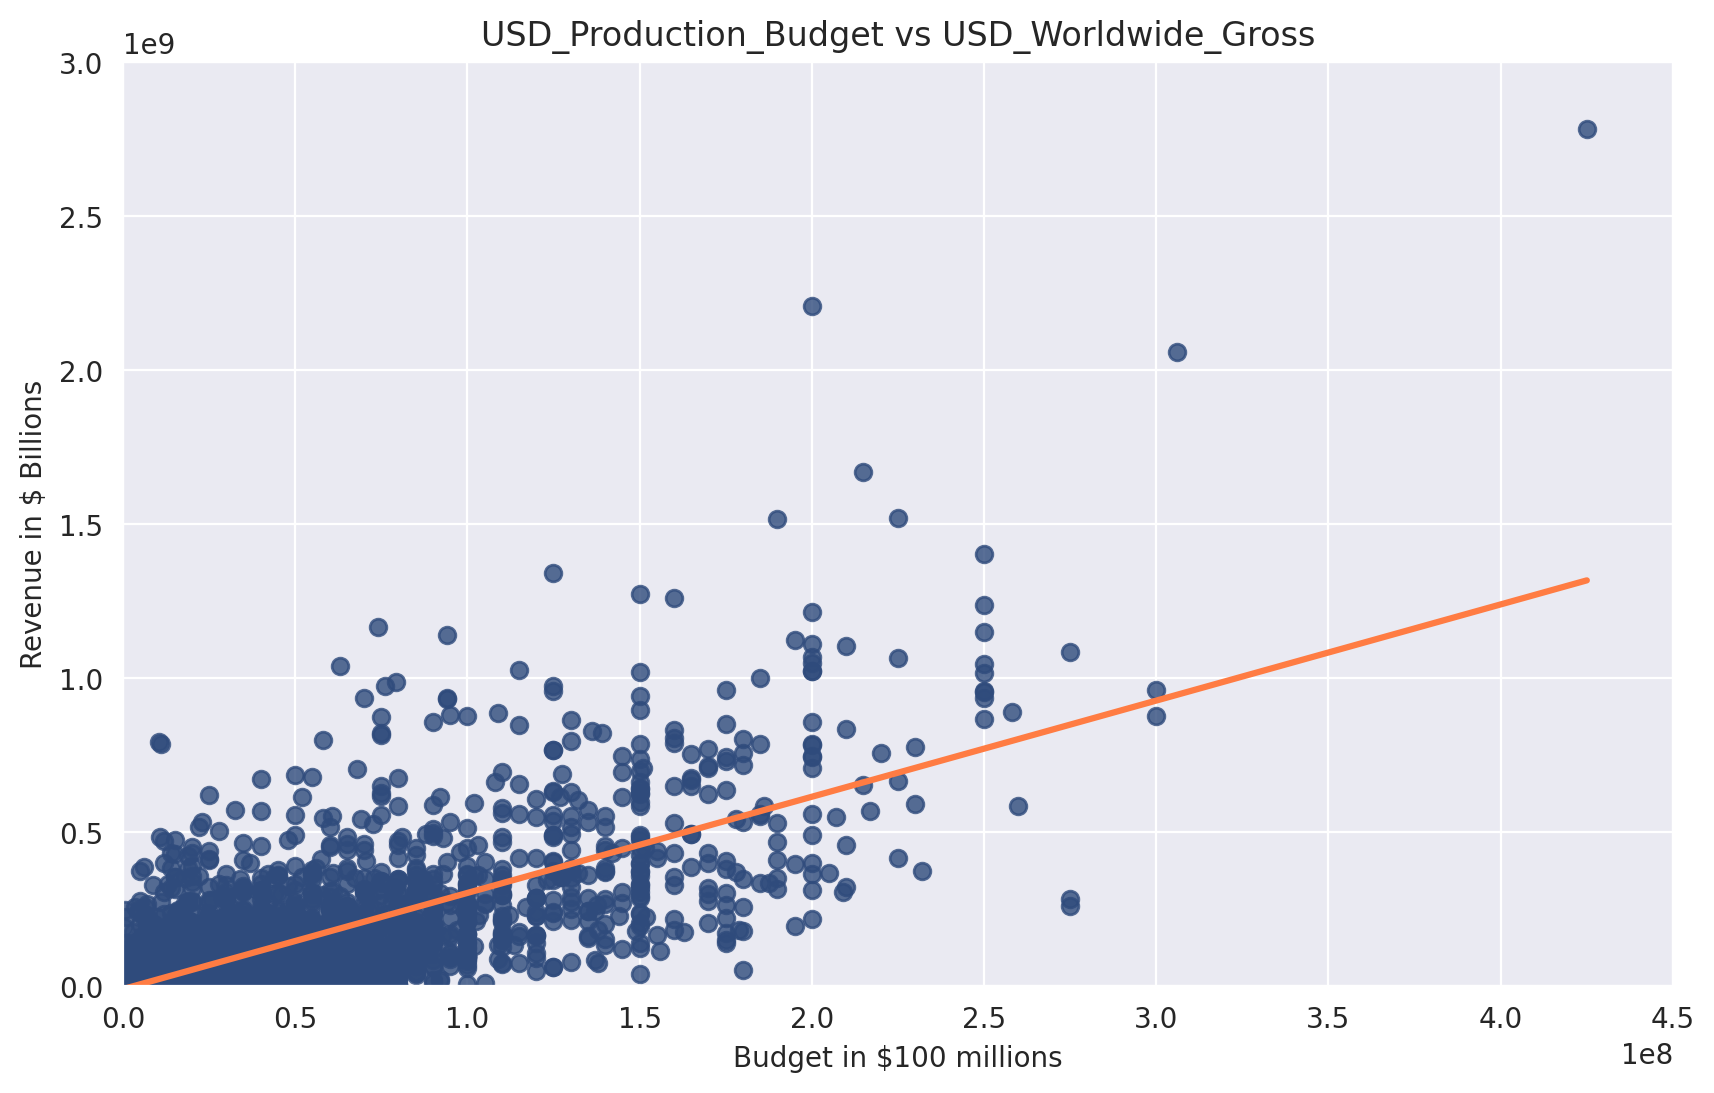

In [151]:
plt.figure(figsize=(10, 6), dpi=200)
with sns.axes_style('darkgrid'):
  ax =sns.regplot(data=new_lims,
                   x='USD_Production_Budget',
                   y='USD_Worldwide_Gross',
                   ci=None,
                   scatter_kws={'alpha': 0.8, 'color':'#2f4b7c'},
                   line_kws={'color': '#ff7c43'}
                   )
  ax.set(
    xlabel='Budget in $100 millions',
    ylabel='Revenue in $ Billions',
    title='USD_Production_Budget vs USD_Worldwide_Gross',
    xlim=(0, 450000000),
    ylim=(0, 3000000000)
    )
plt.show()

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [164]:
#Creating the regression for new_films

regression = LinearRegression()
X = pd.DataFrame(new_lims, columns=['USD_Production_Budget'])
y = pd.DataFrame(new_lims, columns=['USD_Worldwide_Gross'])
regression.fit(X, y)
slope=regression.coef_
y_intercept=regression.intercept_
print(f"Slope: {slope}")
print(f"Y-Intercept: {y_intercept}")
#R-squared
print(regression.score(X, y))

Slope: [[3.12259592]]
Y-Intercept: [-8650768.00661027]
0.5577032617720403


**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [162]:
regression_1= LinearRegression()
X1= pd.DataFrame(old_lims, columns=['USD_Production_Budget'])
y1= pd.DataFrame(old_lims, columns=['USD_Worldwide_Gross'])
regression_1.fit(X1, y1)
print(regression_1.intercept_)
print(regression_1.coef_)
print("Regression Coeff: ",regression_1.score(X1,y1))

[22821538.63508039]
[[1.64771314]]
Regression Coeff:  0.02937258620576877


# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million?

In [167]:
print(f"Predicted Revenue: {regression.predict([[350000000]])}")


budget = 350000000
revenue_estimate = regression.intercept_[0] + regression.coef_[0,0]*budget
revenue_estimate = round(revenue_estimate, -6)
print(f'The estimated revenue for a $350 film is around ${revenue_estimate:.10}.')

Predicted Revenue: [[1.0842578e+09]]
The estimated revenue for a $350 film is around $1.084e+09.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
